In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,mean_squared_error,r2_score
import seaborn as sns

In [2]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()


In [3]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [6]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [8]:
# print target(or label)shape
print(wine.target.shape)

(178,)


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test


In [10]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [11]:
#Accuracy: The amount of correct classifications / the total amount of classifications.
#The train accuracy: The accuracy of a model on examples it was constructed on.
#The test accuracy is the accuracy of a model on examples it hasn't seen.   
accuracy_test_knn=round(knn.score(X_test,y_test)*100,2)
accuracy_train_knn=round(knn.score(X_train,y_train)*100,2)
accuracy_knn=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of KNN',accuracy_train_knn)
print('Testing accuracy of KNN',accuracy_test_knn)
print('Accuracy of KNN:',accuracy_knn)


Training accuracy of KNN 77.42
Testing accuracy of KNN 66.67
Accuracy of KNN: 66.67


In [12]:
print(confusion_matrix(y_test, y_pred))  

[[15  0  4]
 [ 3 10  5]
 [ 0  6 11]]


In [13]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.62      0.56      0.59        18
           2       0.55      0.65      0.59        17

   micro avg       0.67      0.67      0.67        54
   macro avg       0.67      0.66      0.66        54
weighted avg       0.67      0.67      0.67        54



In [14]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['class_0','class_1','class_2'], 
                     columns =['class_0','class_1','class_2'])

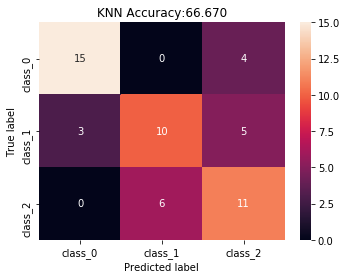

In [15]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN Accuracy:{0:.3f}'.format(accuracy_test_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
#Graph to determine the error rate in K-value selection
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

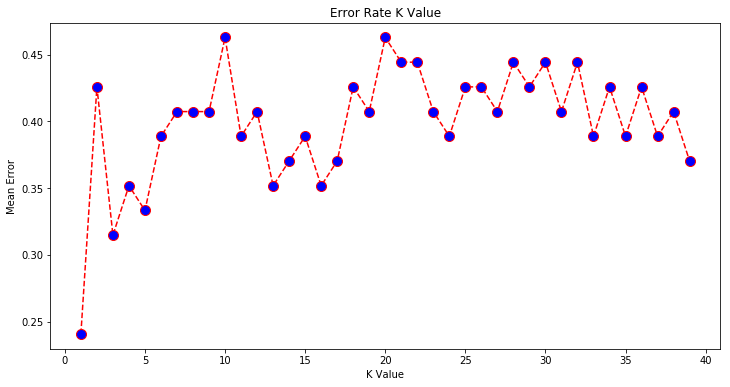

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')    

In [18]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [19]:
#Accuracy: The amount of correct classifications / the total amount of classifications.
#The train accuracy: The accuracy of a model on examples it was constructed on.
#The test accuracy is the accuracy of a model on examples it hasn't seen.   
accuracy_test_knn=round(knn.score(X_test,y_test)*100,2)
accuracy_train_knn=round(knn.score(X_train,y_train)*100,2)
accuracy_knn=round(accuracy_score(y_test, y_pred)*100,2)
print('Training accuracy of KNN',accuracy_train_knn)
print('Testing accuracy of KNN',accuracy_test_knn)
print('Accuracy of KNN:',accuracy_knn)

Training accuracy of KNN 77.42
Testing accuracy of KNN 59.26
Accuracy of KNN: 59.26


In [20]:
print(confusion_matrix(y_test, y_pred))  

[[14  0  5]
 [ 2 10  6]
 [ 0  9  8]]


In [21]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.53      0.56      0.54        18
           2       0.42      0.47      0.44        17

   micro avg       0.59      0.59      0.59        54
   macro avg       0.61      0.59      0.59        54
weighted avg       0.62      0.59      0.60        54



In [22]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['class_0','class_1','class_2'], 
                     columns =['class_0','class_1','class_2'])

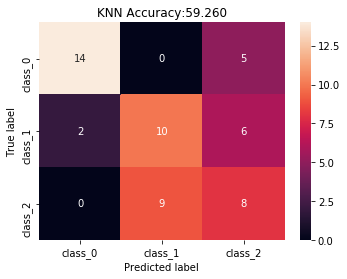

In [23]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN Accuracy:{0:.3f}'.format(accuracy_test_knn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
#Graph to determine the error rate in K-value selection
error = []
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

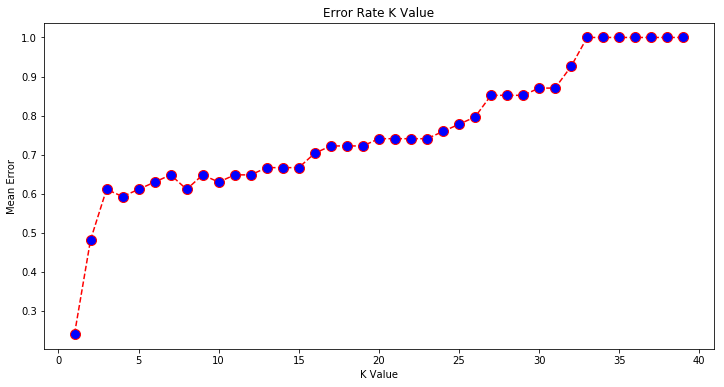

In [27]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')    